Total images: 253
Number of 'no tumor' images: 98
Number of 'tumor' images: 155
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 540ms/step - accuracy: 0.5835 - loss: 0.8327 - val_accuracy: 0.8824 - val_loss: 0.6531
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 506ms/step - accuracy: 0.7696 - loss: 0.6234 - val_accuracy: 0.9020 - val_loss: 0.4417
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 510ms/step - accuracy: 0.7827 - loss: 0.5010 - val_accuracy: 0.8627 - val_loss: 0.4148
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 501ms/step - accuracy: 0.7543 - loss: 0.5287 - val_accuracy: 0.8235 - val_loss: 0.4578
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 484ms/step - accuracy: 0.7464 - loss: 0.4973 - val_accuracy: 0.8824 - val_loss: 0.3648
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 488ms/step - accuracy: 0.8111 - loss: 0.4415 - val_accuracy: 0.8824 - val_loss: 0.3593
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step - accuracy: 0.8162 - loss: 0.4470 - val_accuracy: 0.8824 - val_loss: 0.3922
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 506ms/step - accuracy: 0.8320 - loss: 0.3620 - val_accuracy: 0.8824 - val_loss: 0.3516
Epo

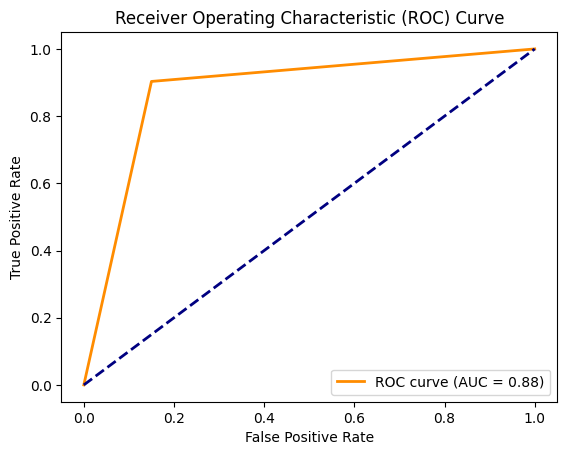

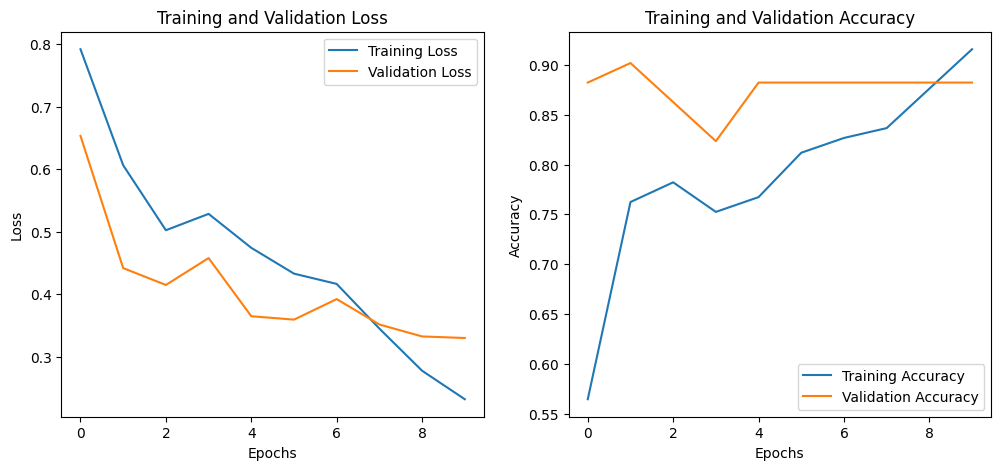

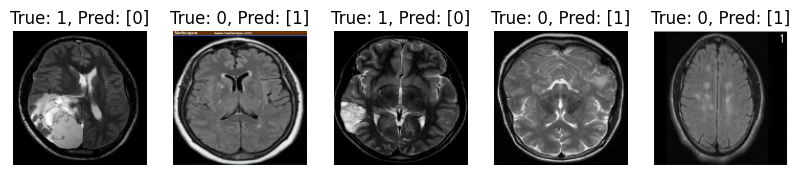

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define the path to the dataset
DATASET_PATH = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"

# Set image parameters
IMG_SIZE = 128  # Resize images to 128x128 pixels
BATCH_SIZE = 32

# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, category in enumerate(["no", "yes"]):  # 'no' for no tumor, 'yes' for tumor
        path = os.path.join(folder, category)
        for filename in os.listdir(path):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0  # Normalize pixel values
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Load the dataset
X, y = load_images_from_folder(DATASET_PATH)

# Dataset Description
print(f"Total images: {len(X)}")
print(f"Number of 'no tumor' images: {np.sum(y == 0)}")
print(f"Number of 'tumor' images: {np.sum(y == 1)}")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Convolutional Neural Network (CNN) model
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),  # Convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    MaxPooling2D(2,2),  # Max pooling layer with 2x2 pool size
    
    Conv2D(64, (3,3), activation='relu'),  # Convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    MaxPooling2D(2,2),  # Max pooling layer with 2x2 pool size
    
    Conv2D(128, (3,3), activation='relu'),  # Convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    MaxPooling2D(2,2),  # Max pooling layer with 2x2 pool size

    Flatten(),  # Flatten layer to convert 2D matrix to 1D vector
    Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Predict on test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Error Analysis: Visualize Misclassified Examples
misclassified = np.where(y_pred.flatten() != y_test)[0]
plt.figure(figsize=(10, 5))
for i, idx in enumerate(misclassified[:5]):  # Display first 5 misclassified images
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.show()

# Save the trained model
model.save("/kaggle/working/brain_tumor_model.h5")

Total images: 253
No tumor images: 98
Tumor images: 155


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 525ms/step - accuracy: 0.5240 - loss: 0.8400 - val_accuracy: 0.8824 - val_loss: 0.6084
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 578ms/step - accuracy: 0.7172 - loss: 0.5885 - val_accuracy: 0.7843 - val_loss: 0.4879
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.7174 - loss: 0.5561 - val_accuracy: 0.8235 - val_loss: 0.4252
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 492ms/step - accuracy: 0.7496 - loss: 0.5042 - val_accuracy: 0.8824 - val_loss: 0.3979
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 495ms/step - accuracy: 0.7939 - loss: 0.4733 - val_accuracy: 0.8627 - val_loss: 0.3944
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 474ms/step - accuracy: 0.8211 - loss: 0.4575 - val_accuracy: 0.8627 - val_loss: 0.3880
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 502ms/step - accuracy: 0.8387 - loss: 0.3693 - val_accuracy: 0.8824 - val_loss: 0.3700
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - accuracy: 0.8471 - loss: 0.3622 - val_accuracy: 0.8627 - val_loss:

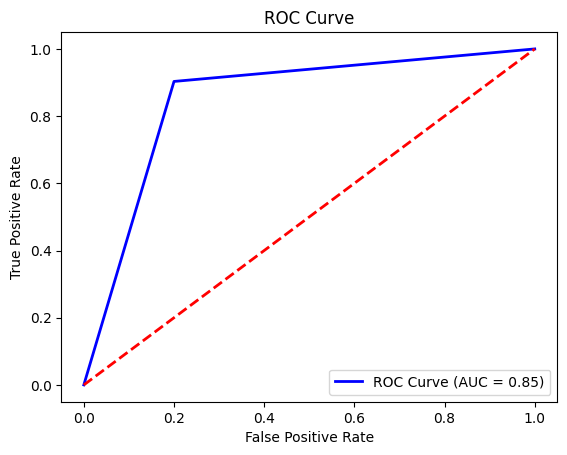

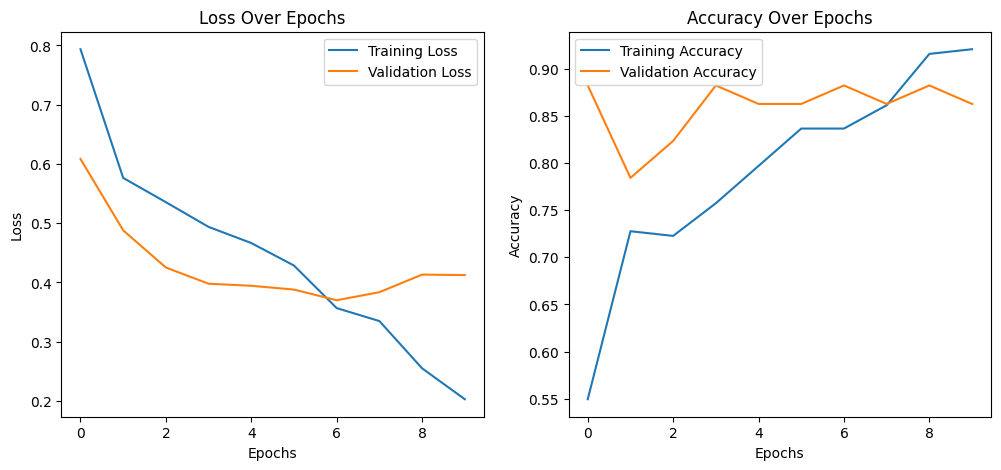

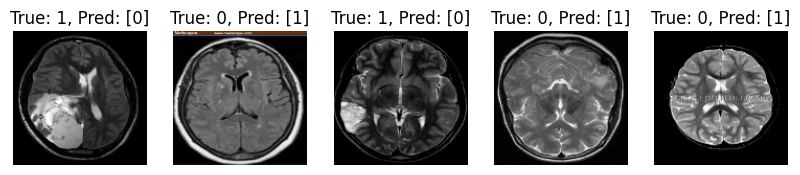

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define dataset and parameters
dataset_dir = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"
image_size = 128  # Resize images to 128x128
batch_size = 32

# Function to load and preprocess images
def load_data(directory):
    data = []
    labels = []
    for class_label, class_name in enumerate(["no", "yes"]):  # 'no' for no tumor, 'yes' for tumor
        class_path = os.path.join(directory, class_name)
        for image_name in os.listdir(class_path):
            image = cv2.imread(os.path.join(class_path, image_name))
            if image is not None:
                image = cv2.resize(image, (image_size, image_size))
                image = image / 255.0  # Normalize pixel values
                data.append(image)
                labels.append(class_label)
    return np.array(data), np.array(labels)

# Load the dataset
images, labels = load_data(dataset_dir)

# Dataset statistics
print(f"Total images: {len(images)}")
print(f"No tumor images: {np.sum(labels == 0)}")
print(f"Tumor images: {np.sum(labels == 1)}")

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define the CNN architecture
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

# Create and compile the model
model = create_model((image_size, image_size, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
training_history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=batch_size,
    validation_data=(test_images, test_labels)
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(test_images)
predictions = (predictions > 0.5).astype(int)

# Calculate evaluation metrics
precision = precision_score(test_labels, predictions)
recall = recall_score(test_labels, predictions)
f1 = f1_score(test_labels, predictions)
conf_matrix = confusion_matrix(test_labels, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot ROC curve
false_positive_rate, true_positive_rate, _ = roc_curve(test_labels, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.figure()
plt.plot(false_positive_rate, true_positive_rate, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training and validation performance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.show()

# Visualize misclassified examples
misclassified_indices = np.where(predictions.flatten() != test_labels)[0]
plt.figure(figsize=(10, 5))
for i, index in enumerate(misclassified_indices[:5]):  # Display first 5 misclassified images
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[index])
    plt.title(f"True: {test_labels[index]}, Pred: {predictions[index]}")
    plt.axis('off')
plt.show()

# Save the model
model.save("/kaggle/working/brain_tumor_model.h5")